In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [2]:
machine = pd.read_csv('Equipment data from keggel/PdM_machines.csv')
maintenance = pd.read_csv('Equipment data from keggel/PdM_maint.csv')
telemetry = pd.read_csv('Equipment data from keggel/PdM_telemetry.csv')
failures = pd.read_csv('Equipment data from keggel/PdM_failures.csv')
errors = pd.read_csv('Equipment data from keggel/PdM_errors.csv')



In [4]:
maintenance['datetimetime'] = pd.to_datetime(maintenance['datetime'])
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])
errors['datetime'] = pd.to_datetime(errors['datetime'])
failures['datetime'] = pd.to_datetime(failures['datetime'])

In [5]:
telemetry_merge = pd.merge(telemetry, machine, on='machineID', how='left')
telemetry_mean = telemetry.groupby('machineID').mean().reset_index()
maintenance_merged = pd.merge(maintenance, machine, on='machineID', how='left')


merged_data_machine_telemetry = pd.merge(machine, telemetry_mean, on='machineID', how='left')
maintenance_count = maintenance.groupby('machineID').size().reset_index(name='maintenance_count')
print(telemetry_merge)

                  datetime  machineID        volt      rotate    pressure  \
0      2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1      2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2      2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3      2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4      2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                    ...        ...         ...         ...         ...   
876095 2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876096 2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876097 2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876098 2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876099 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration   model  age  
0       45.087686  model3   18  
1       4

Visualization of Machines maintanace 

C:\Users\natha\AppData\Local\Temp\ipykernel_18668\1512516800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machine_maintenance['datetime'] = pd.to_datetime(machine_maintenance['datetime'])


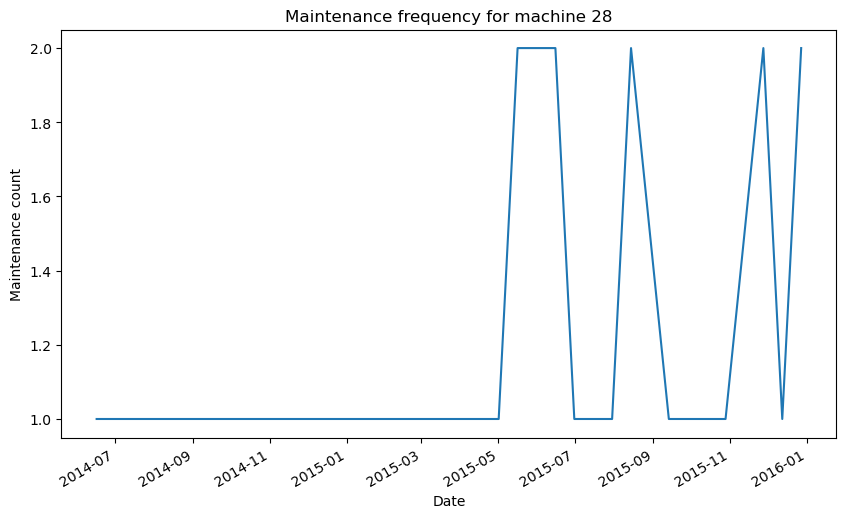

In [7]:
machine_id = 28  # replace with your machine ID
machine_maintenance = maintenance[maintenance['machineID'] == machine_id]


machine_maintenance['datetime'] = pd.to_datetime(machine_maintenance['datetime'])
maintenance_counts = machine_maintenance['datetime'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
maintenance_counts.plot(kind='line')
plt.title(f'Maintenance frequency for machine {machine_id}')
plt.xlabel('Date')
plt.ylabel('Maintenance count')
plt.show()

Visualization of Errors on each machines And Which error happens the most

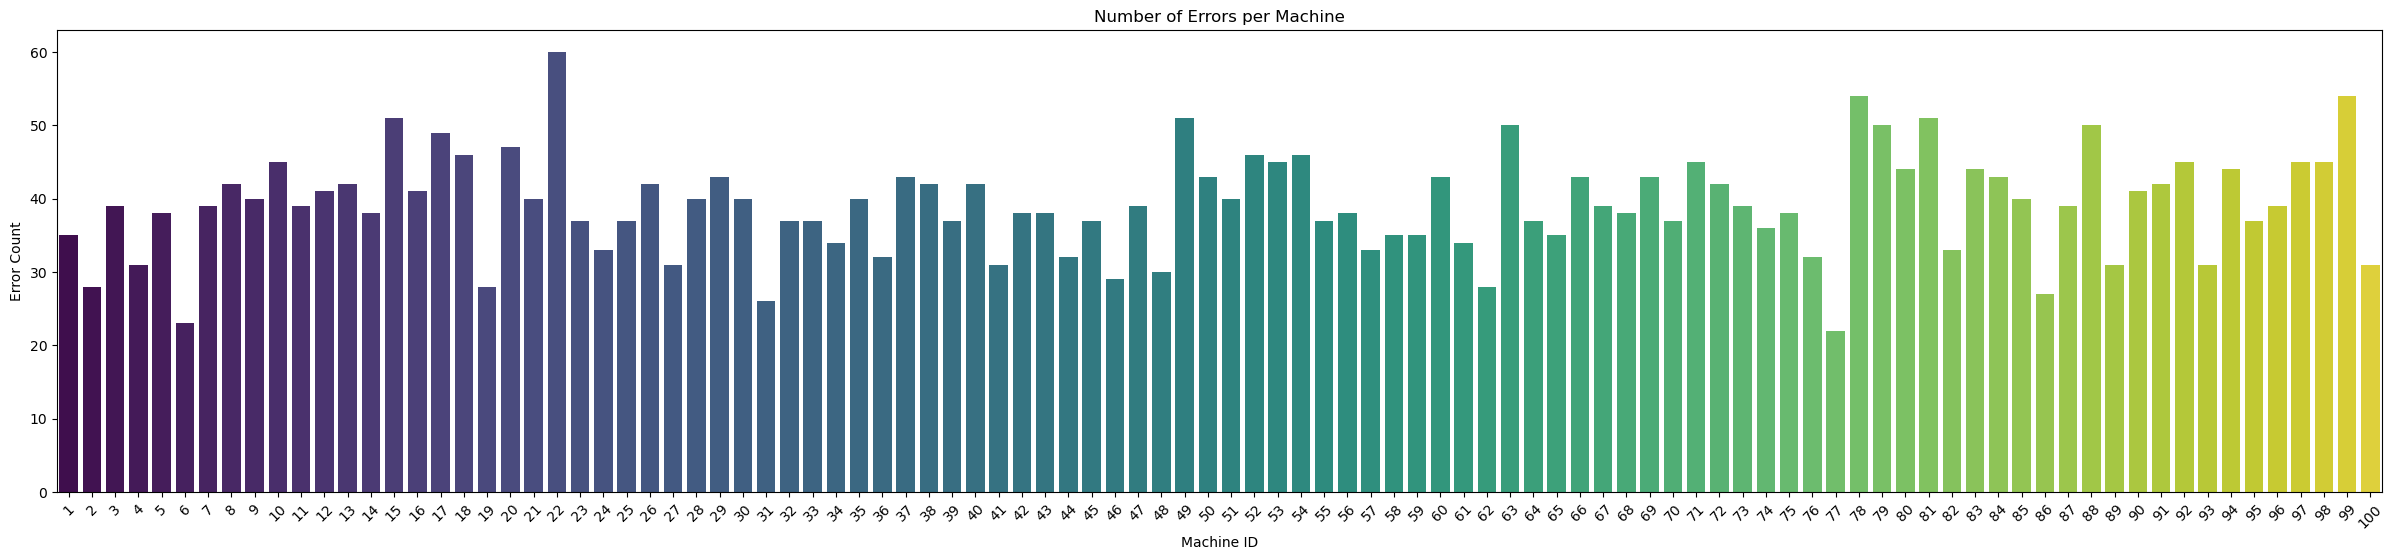

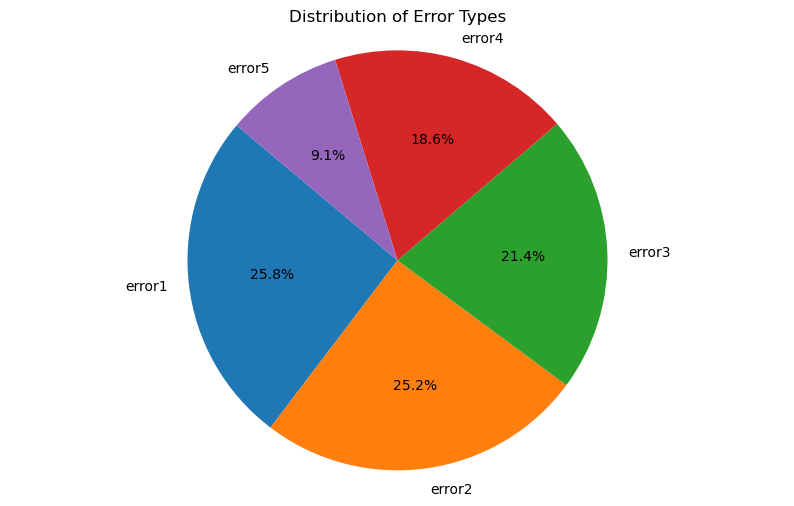

In [8]:


# Count the number of errors per machine
error_counts = errors['machineID'].value_counts().reset_index()
error_counts.columns = ['machineID', 'error_count']

# Plotting
plt.figure(figsize=(30, 6))
sns.barplot(x='machineID', y='error_count', data=error_counts, palette='viridis')
plt.title('Number of Errors per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Error Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for the distribution of error types
plt.figure(figsize=(10, 6))
error_type_counts = errors['errorID'].value_counts()
plt.pie(error_type_counts, labels=error_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Error Types')
plt.axis('equal')
plt.show()


Merged table for distrubution chart

In [11]:
print("Merged Telemetry Data Table:")
print(telemetry_merge.head())
plt.figure(figsize=(14, 8))

Merged Telemetry Data Table:
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration   model  age  
0  45.087686  model3   18  
1  43.413973  model3   18  
2  34.178847  model3   18  
3  41.122144  model3   18  
4  25.990511  model3   18  


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

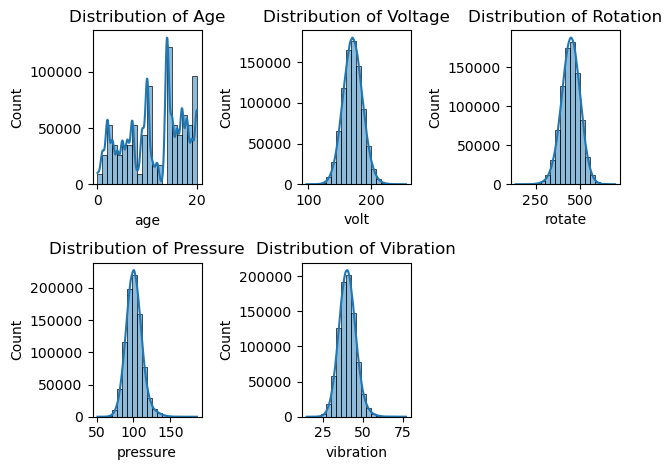

In [12]:
plt.subplot(2, 3, 1)
sns.histplot(telemetry_merge['age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 3, 2)
sns.histplot(telemetry_merge['volt'], bins=20, kde=True)
plt.title('Distribution of Voltage')

plt.subplot(2, 3, 3)
sns.histplot(telemetry_merge['rotate'], bins=20, kde=True)
plt.title('Distribution of Rotation')

plt.subplot(2, 3, 4)
sns.histplot(telemetry_merge['pressure'], bins=20, kde=True)
plt.title('Distribution of Pressure')

plt.subplot(2, 3, 5)
sns.histplot(telemetry_merge['vibration'], bins=20, kde=True)
plt.title('Distribution of Vibration')

plt.tight_layout()
plt.show()

Find out frequency of Maintenance, Error by components and Failures by Machine Model

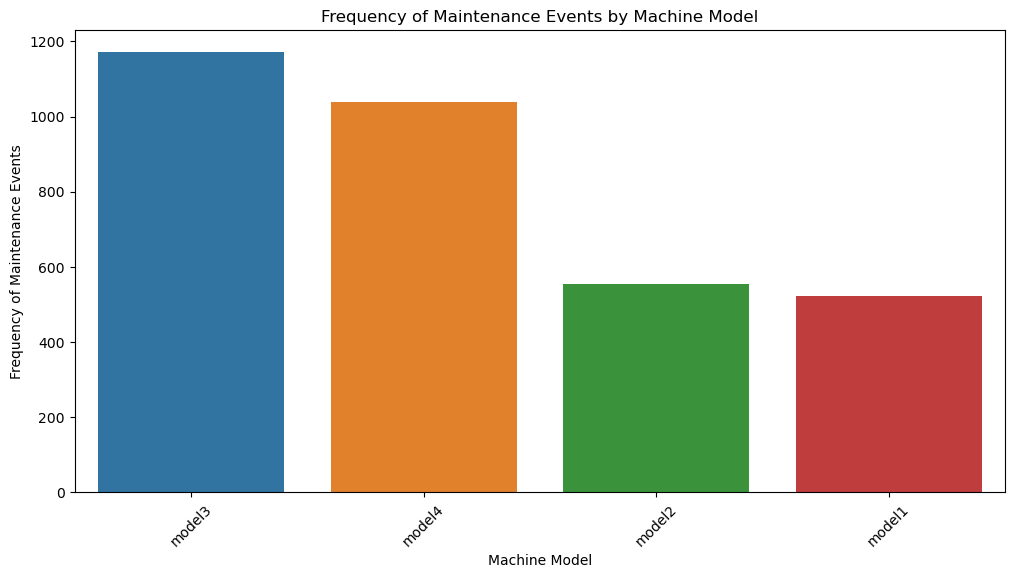

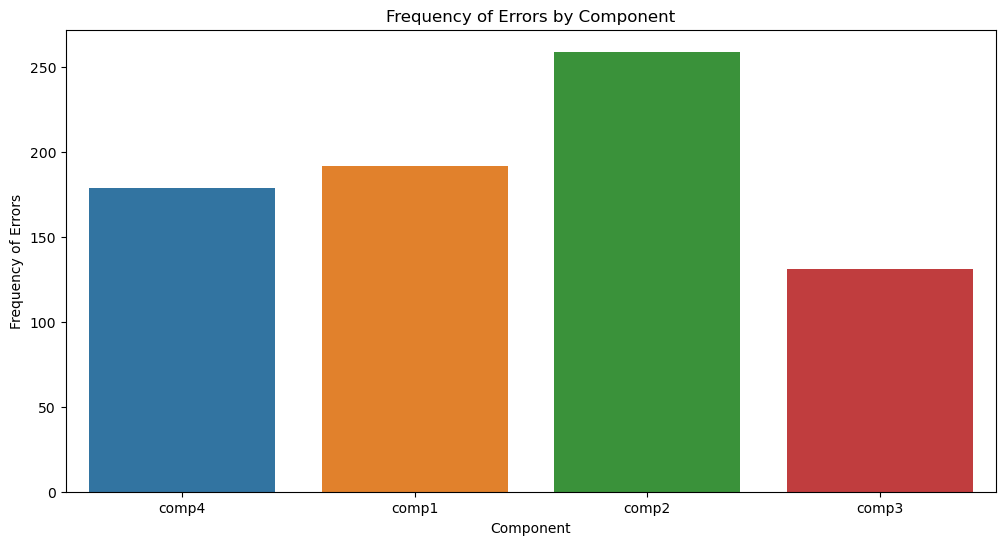

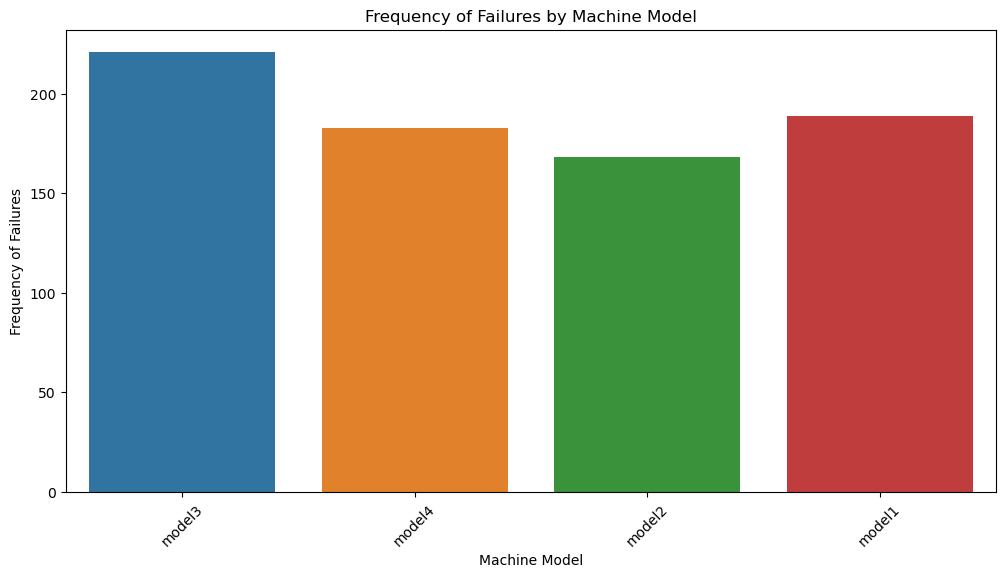

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='model', data=maintenance_merged)
plt.title('Frequency of Maintenance Events by Machine Model')
plt.xlabel('Machine Model')
plt.ylabel('Frequency of Maintenance Events')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='failure', data=failures)
plt.title('Frequency of Errors by Component')
plt.xlabel('Component')
plt.ylabel('Frequency of Errors')
plt.show()


plt.figure(figsize=(12, 6))
failures_merged = pd.merge(failures, machine, on='machineID', how='left')
sns.countplot(x='model', data=failures_merged)
plt.title('Frequency of Failures by Machine Model')
plt.xlabel('Machine Model')
plt.ylabel('Frequency of Failures')
plt.xticks(rotation=45)
plt.show()

Learn the correlation of the telemetry data using correlation method

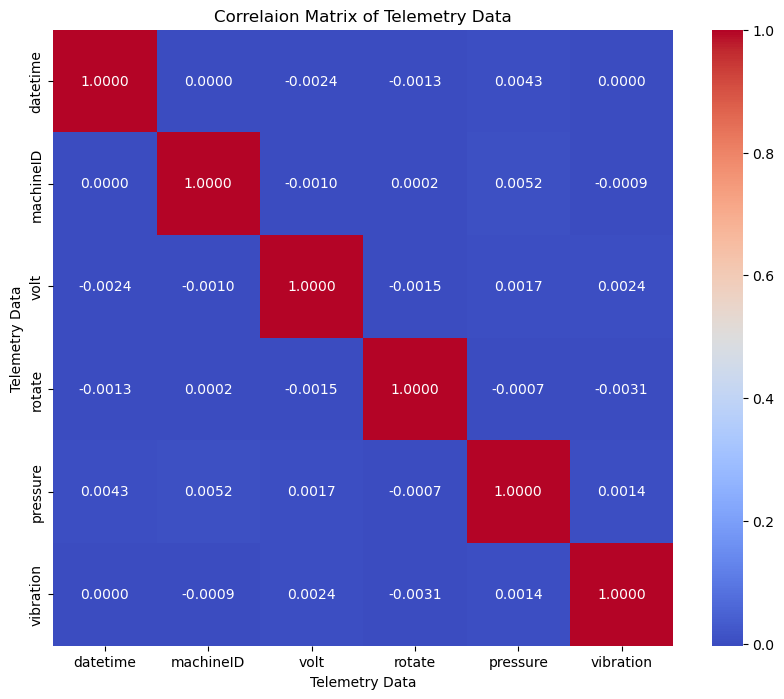

In [14]:
correlation = telemetry.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = '.4f')
plt.title('Correlaion Matrix of Telemetry Data')
plt.xlabel('Telemetry Data')
plt.ylabel('Telemetry Data')
plt.show()

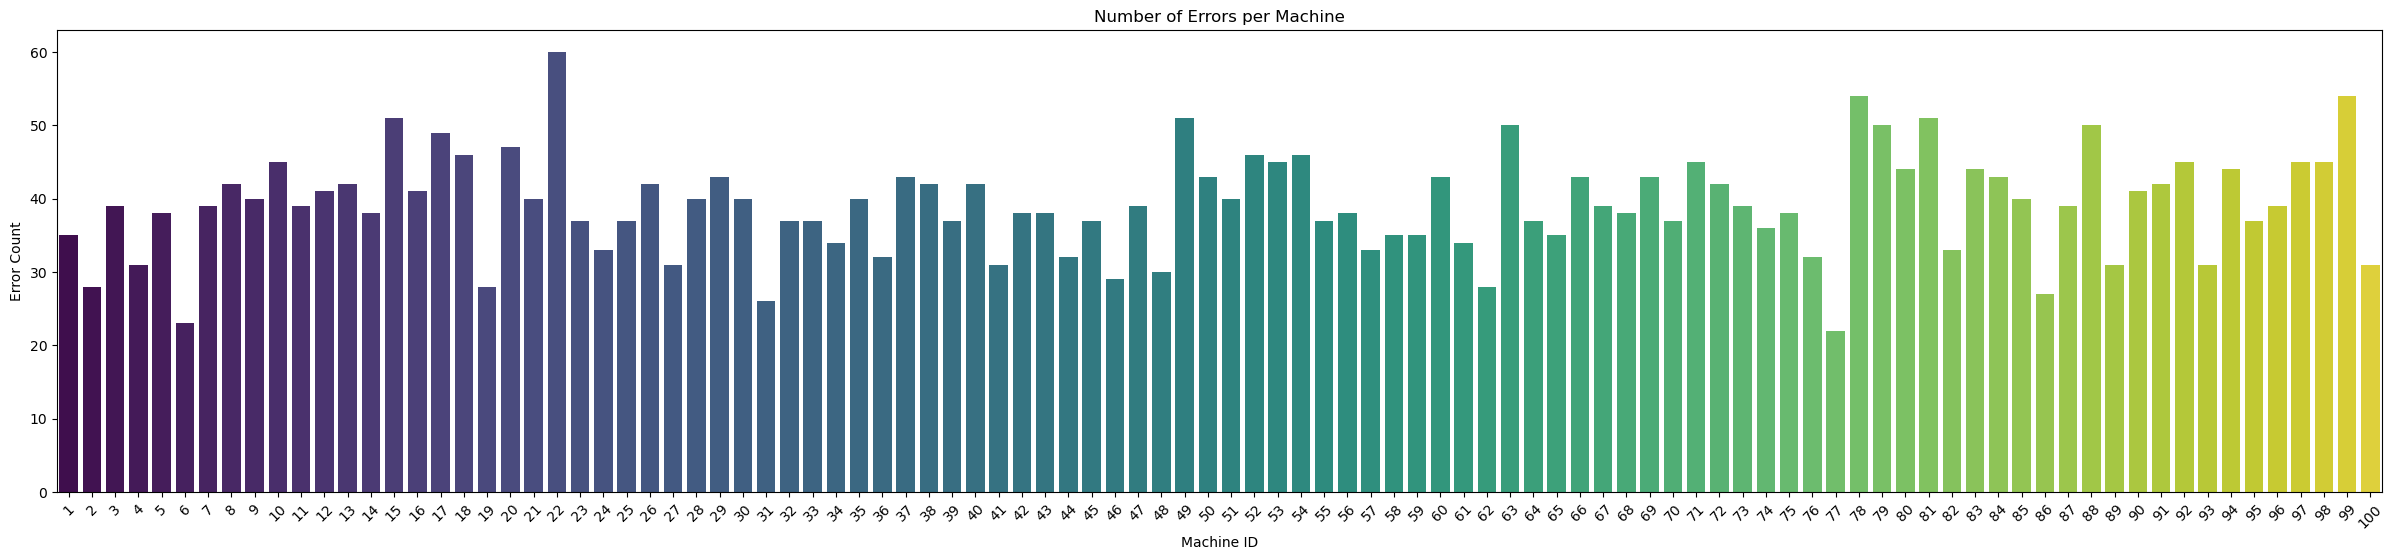

In [44]:
merged_error = pd.merge(telemetry, errors[['machineID', 'errorID']], how='left', on='machineID')

# Count the number of errors per machine
error_counts = errors['machineID'].value_counts().reset_index()
error_counts.columns = ['machineID', 'error_count']

# Plotting
plt.figure(figsize=(30, 6))
sns.barplot(x='machineID', y='error_count', data=error_counts, palette='viridis')
plt.title('Number of Errors per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Error Count')
plt.xticks(rotation=45)
plt.show()


In [9]:
merged_failure = pd.merge(telemetry, failures[['machineID', 'failure']], how='left', on='machineID')

failed_telemery = merged_failure[merged_failure['failure'].notnull()]

# encode the failure column to 1 and 0
failed_telemery = failed_telemery.replace({'comp1': 1, 'comp2': 2, 'comp3': 3, 'comp4': 4, 'comp5': 5})



display(merged_failure)

,datetime,machineID,volt,rotate,pressure,vibration,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,comp4
1,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,comp1
2,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,comp2
3,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,comp4
4,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,comp4
...,...,...,...,...,...,...,...
6684638,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,comp1
6684639,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,comp2
6684640,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245,comp1
6684641,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245,comp1


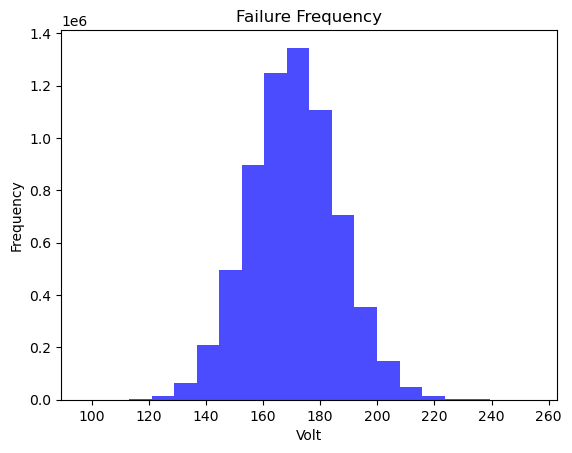

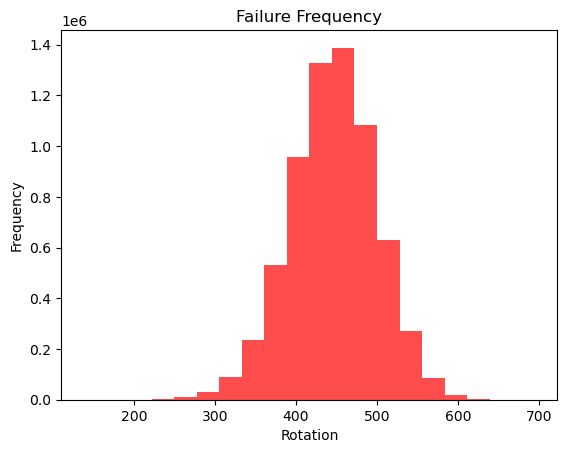

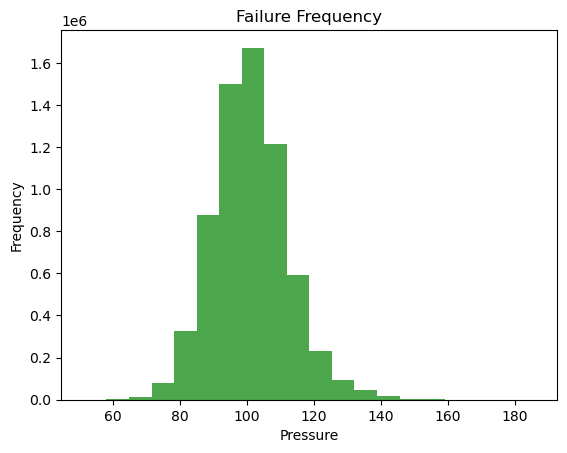

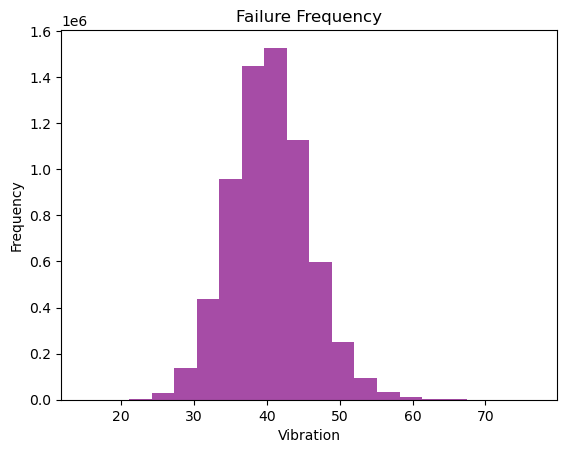

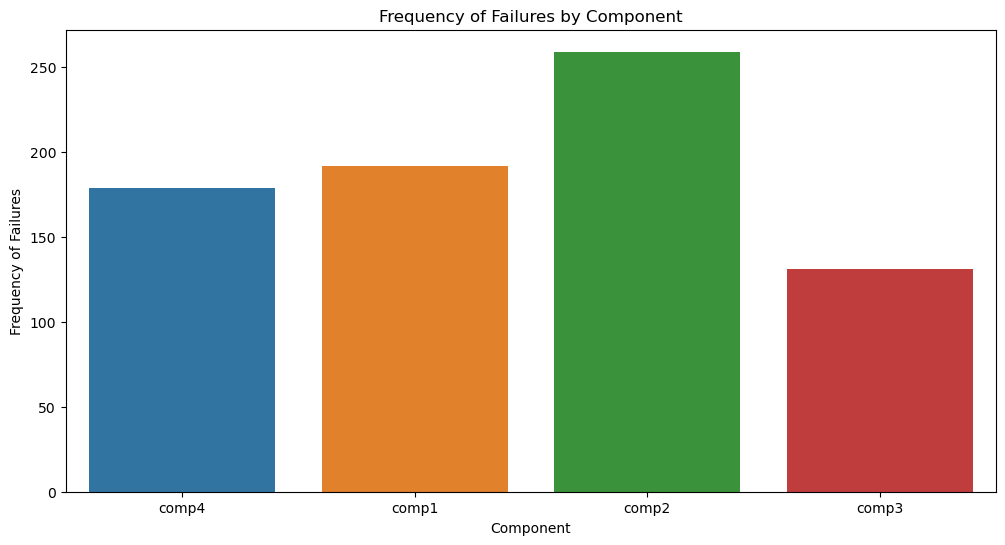

In [7]:
plt.hist(failed_telemery['volt'], bins=20, color='blue', alpha=0.7, label='Voltage')
plt.xlabel('Volt')
plt.ylabel('Frequency')
plt.title('Failure Frequency')
plt.show()

plt.hist(failed_telemery['rotate'], bins=20, color='red', alpha=0.7, label='Rotation')
plt.xlabel('Rotation')
plt.ylabel('Frequency')
plt.title('Failure Frequency')
plt.show()

plt.hist(failed_telemery['pressure'], bins=20, color='green', alpha=0.7, label='Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.title('Failure Frequency')
plt.show()

plt.hist(failed_telemery['vibration'], bins=20, color='purple', alpha=0.7, label='Vibration')
plt.xlabel('Vibration')
plt.ylabel('Frequency')
plt.title('Failure Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='failure', data=failures)
plt.title('Frequency of Failures by Component')
plt.xlabel('Component')
plt.ylabel('Frequency of Failures')
plt.show()



In [15]:
errors_with_telemetry = pd.merge(errors,telemetry, on=['machineID','datetime'], how='left')

specific_error = 1
error_telemetry = errors_with_telemetry[errors_with_telemetry['errorID'] == specific_error]
print(error_telemetry[['datetime','volt','rotate','pressure','vibration']])

Empty DataFrame
Columns: [datetime, volt, rotate, pressure, vibration]
Index: []


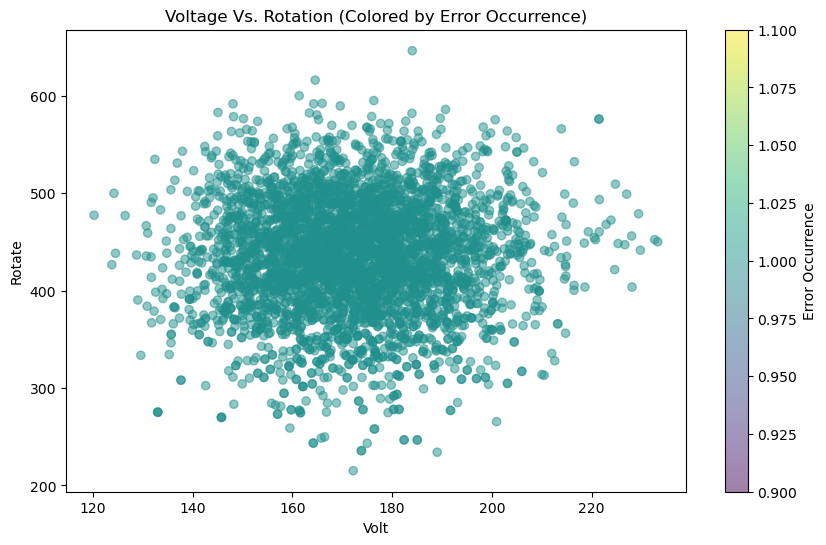

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(errors_with_telemetry['volt'],errors_with_telemetry['rotate'], c=errors_with_telemetry['errorID'].notnull(),cmap='viridis',alpha=0.5)
plt.colorbar(label='Error Occurrence')
plt.xlabel('Volt')
plt.ylabel('Rotate')
plt.title('Voltage Vs. Rotation (Colored by Error Occurrence)')
plt.show()

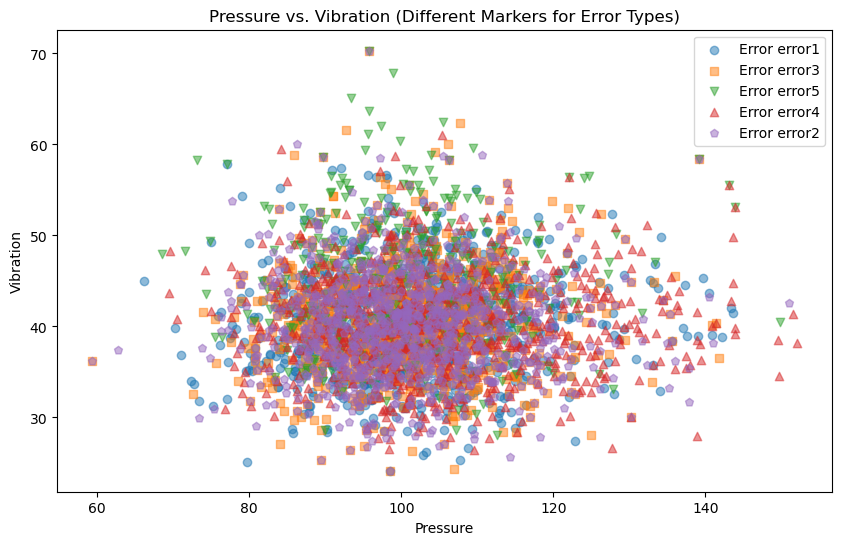

In [ ]:
plt.figure(figsize=(10, 6))
markers = ['o', 's', 'v', '^', 'p']
for error_id, marker in zip(errors_with_telemetry['errorID'].unique(), markers):
    error_data = errors_with_telemetry[errors_with_telemetry['errorID'] == error_id]
    plt.scatter(error_data['pressure'], error_data['vibration'], marker=marker, label=f'Error {error_id}', alpha=0.5)
plt.xlabel('Pressure')
plt.ylabel('Vibration')
plt.title('Pressure vs. Vibration (Different Markers for Error Types)')
plt.legend()
plt.show()


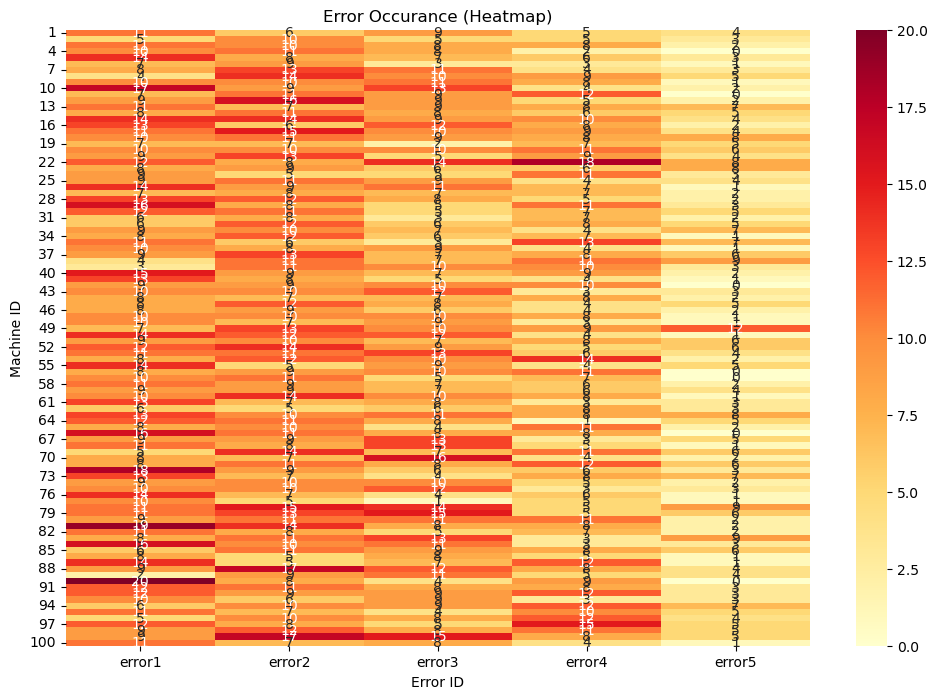

In [ ]:
error_counts = errors.groupby(['machineID','errorID']).size().reset_index(name='error-count')
pivot_table = error_counts.pivot(index='machineID', columns='errorID', values='error-count').fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Error Occurance (Heatmap)')
plt.xlabel('Error ID')
plt.ylabel('Machine ID')
plt.show()

# Creating Model in Supervised learning using Random Forest algo


In [8]:
merged_failure['failure'] = merged_failure['failure'].fillna(0)

features = ['volt', 'rotate', 'pressure', 'vibration']
target = 'failure'

X = merged_failure[features]
y = merged_failure[target]

# Encode target's catagoical data comp1,comp2,comp3,comp4 and comp5 to 1,2,3,4 and 5
y = y.replace({'comp1': 1, 'comp2': 2, 'comp3': 3, 'comp4': 4, 'comp5': 5})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .2f}')
print(classification_report(y_test, y_pred))

Accuracy:  0.30


c:\Users\natha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\natha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3496
           1       0.25      0.17      0.20    336868
           2       0.34      0.32      0.33    453447
           3       0.29      0.36      0.32    229772
           4       0.30      0.37      0.33    313346

    accuracy                           0.30   1336929
   macro avg       0.23      0.24      0.24   1336929
weighted avg       0.30      0.30      0.29   1336929



c:\Users\natha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
# save the model to a file 
import pickle 
filename = "predective_maintenance_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)


NameError: name 'rf_model' is not defined

Another model Creation based on second dataset

In [3]:
testdata = './Equipment data from keggel/test.csv'
traindata = './Equipment data from keggel/train.csv'


test = pd.read_csv(testdata)
train = pd.read_csv(traindata)

In [4]:
display(train)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [23]:
# Remove the last 5 rows from the test data
train = train.drop(['TWF','HDF','PWF','OSF','RNF'], axis=1)
# train = train.drop(['Product ID'], axis=1)
display(train)

KeyError: "['TWF', 'HDF', 'PWF', 'OSF', 'RNF'] not found in axis"

In [6]:
# Change the type column to numerical values
train['Type'] = train['Type'].replace({'L': 1, 'M': 2, 'H': 3})
display(train)

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,2,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,3,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,1,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,1,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


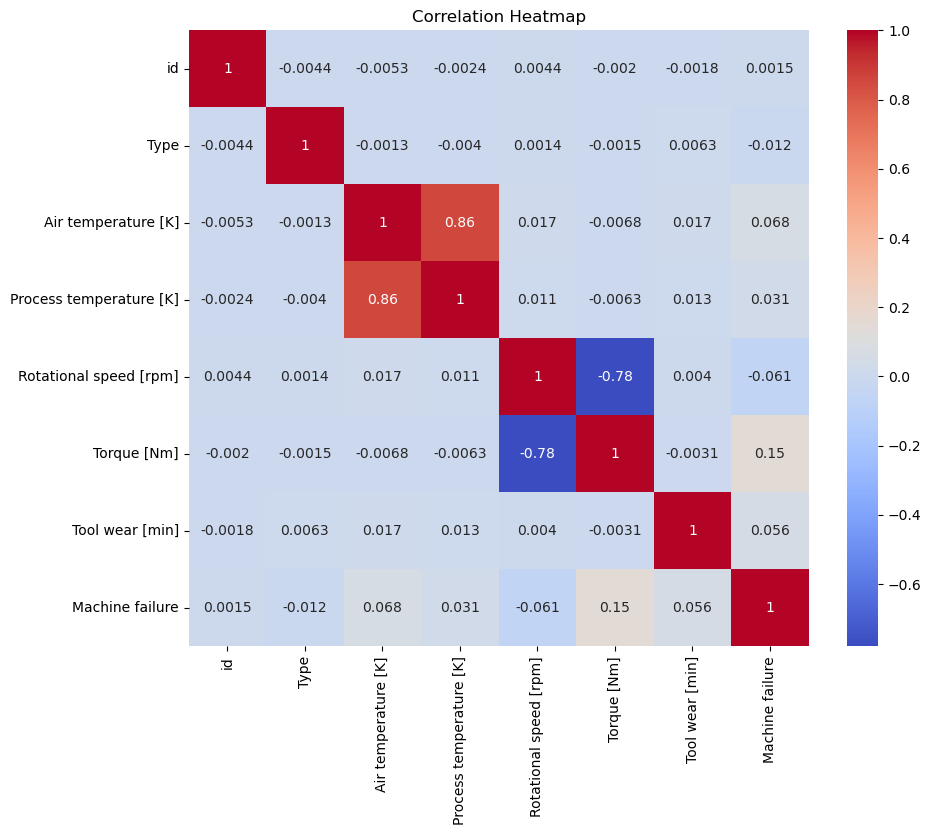

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True, cmap='coolwarm')
plt.title ('Correlation Heatmap')
plt.show()

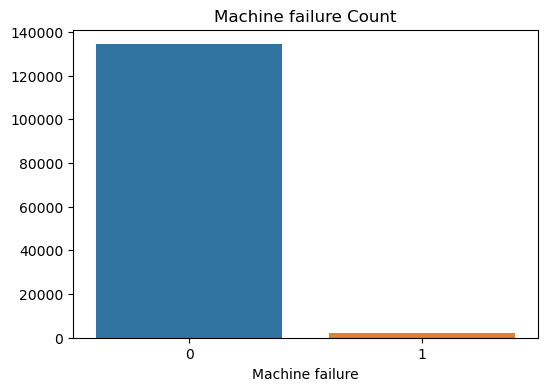

In [8]:
failure_counts = train['Machine failure'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=failure_counts.index, y=failure_counts.values)
plt.title('Machine failure Count')
plt.xlabel('Machine failure')
plt.ylabel
plt.show()

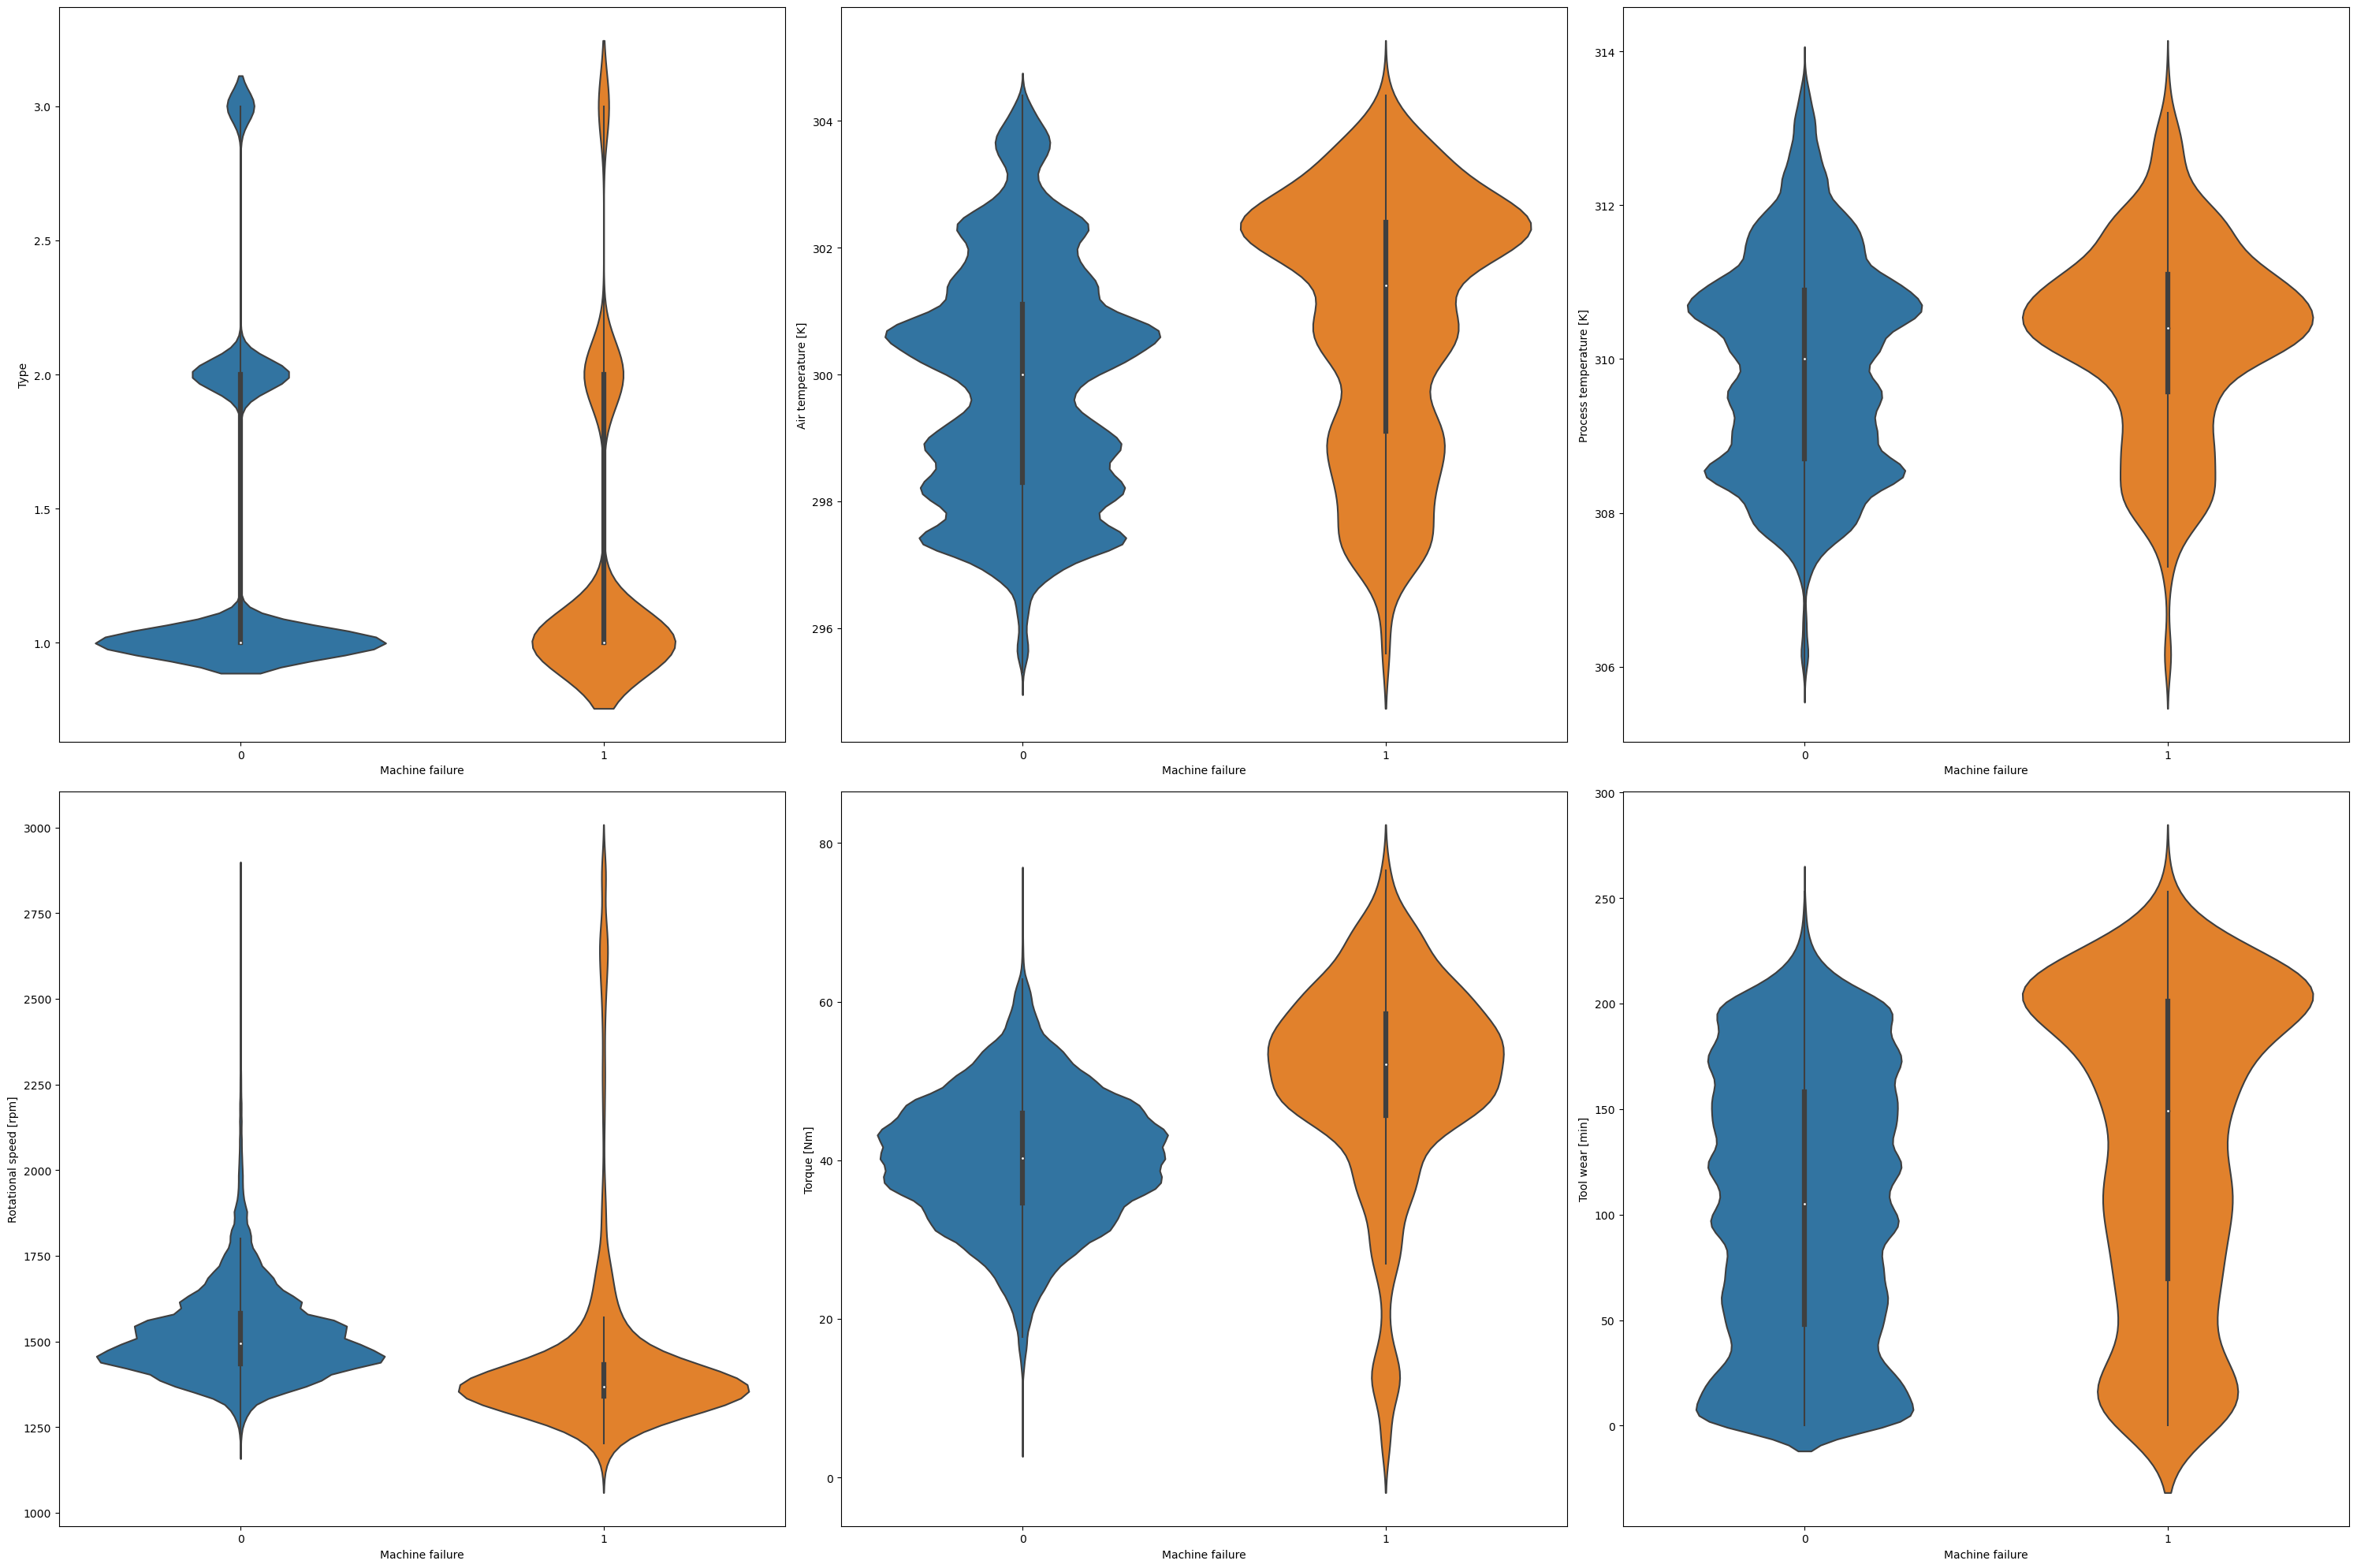

In [26]:
# Calculating the number of rows and columns needed for the plot
n = len(train.columns[1:-1])
ncols = 3
nrows = int(np.ceil(n / ncols))
# Violin plot of all the features vs machine failure
plt.figure(figsize=(30, 20))
for i, col in enumerate(train.columns[1:-1]):
    plt.subplot(nrows, ncols, i+1)
    sns.violinplot(x='Machine failure', y=col, data=train)
plt.tight_layout()
plt.show()


In [27]:
print(train.columns)

Index(['id', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')


c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1200x1000 with 0 Axes>

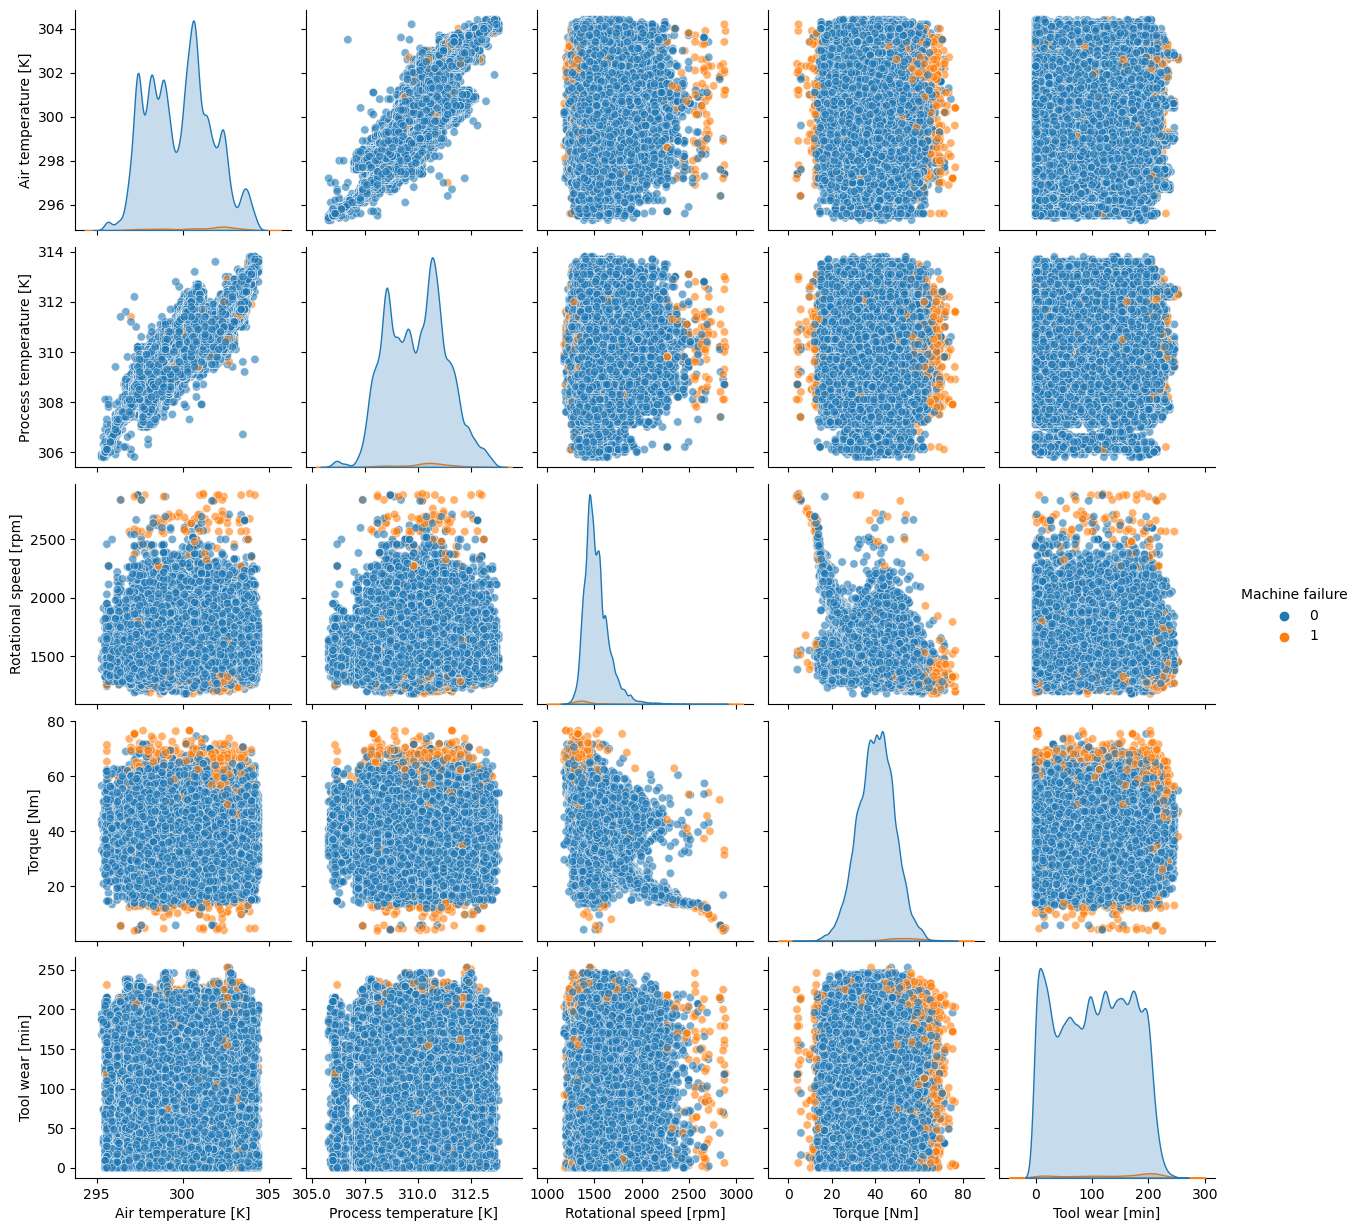

In [14]:
plt.figure(figsize=(12, 10))
sns.pairplot(train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']], hue='Machine failure', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

In [15]:
# Calculating the Standard Deviation of the features
std = train.std()
print(std)


id                         39383.804275
Type                           0.602480
Air temperature [K]            1.862247
Process temperature [K]        1.385173
Rotational speed [rpm]       138.736632
Torque [Nm]                    8.502229
Tool wear [min]               63.965040
Machine failure                0.124486
TWF                            0.039389
HDF                            0.071649
PWF                            0.048899
OSF                            0.062789
RNF                            0.047461
dtype: float64


In [16]:
#  Create a model to predict the machine failure using the train data by support vector regression 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train.drop(['Machine failure'], axis=1)
y = train['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse: .2f}')

Mean Squared Error:  0.02


In [17]:
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
y_pred = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .2f}')

Accuracy:  0.98


In [28]:
# save the model to a file
import pickle 
filename = "Predictive_maintenance_model V2.pkl"
with open(filename, 'wb') as file:
    pickle.dump(svr, file)
